You might have gotten texts or emails with analysis by "MIT mathematician" [sic] Shiva Ayyadurai, who goes by Dr. Shiva. 

He is a loony conspiracy theorist and perennial candidate in Massachusetts who posts videos every time he loses claiming fraud. 

He didn't even do the analysis he purports to have done: the charts are credited to someone else. Fortunately, these data come from public sources and we can produce the charts ourselves.

You can download the data yourself right here: https://results.enr.clarityelections.com/MI/Oakland/105840/web.264614/#/summary

The analysis assumes you downloaded the Excel file ("Detail XLS"). Scroll down to the "Reports" section on the right, like so.

![Oakland County Registrar Data Download Page](screenshot3.png)

![Oakland County Registrar Data Download Page](screenshot4.png)

The rest of this analysis requires Python 3, as well as the packages pandas, matplotlib, and numpy (installed using pip). If you don't have the right version of pandas's dependencies you can have trouble opening that .xls file. I opened it in LibreOffice and saved it as a .xlsx file, and everything worked smoothly from there.

## Loading the data

In [1]:
# here we import some data analysis tbools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

First, let's access the precinct names and vote totals from the "Registered Voters" sheet.

In [2]:
# make sure the data file is unzipped and in your current working directory
# if it's not named detail.xlsx, make sure to update the first line

ballots_cast = pd.read_excel('detail.xlsx', sheet_name='Registered Voters') # load "Registered Voters" sheet
precinct_names = ballots_cast.iloc[0:-1,[0]].to_numpy() # get precinct names (column 0)
total_ballots_by_precinct = ballots_cast.iloc[0:-1,[2]].to_numpy() # get total ballots cast by precinct (column 2)

Now let's access the number of people who checked that straight-party bubble in the partisan voting section of their ballot from sheet "2". Similarly, we can get the total number of votes for Biden and Trump from sheet "3".

In [3]:
df_straight_party = pd.read_excel('detail.xlsx', sheet_name='2') # load sheet "2"
dem_straight_ticket_totals = df_straight_party.iloc[2:-1,[4]].to_numpy() # straight-ticket Democratic vote totals by precinct (column 4)
gop_straight_ticket_totals = df_straight_party.iloc[2:-1,[7]].to_numpy() # straight-ticket GOP vote totals by precinct (column 7)

In [4]:
df_totals = pd.read_excel('detail.xlsx', sheet_name='3') # load sheet "3"
biden_harris_total_by_precinct = df_totals.iloc[2:-1,[4]].to_numpy() # total number of Biden-Harris votes by precinct (column 4)
trump_pence_total_by_precinct = df_totals.iloc[2:-1,[7]].to_numpy() # total number of Trump-Pence votes by precinct (column 7)

We can now access the share of ballots marked for Trump (either via straight-ticket voting, or by filling in the bubble corresponding to Trump/Pence on the presidenial line).

In [5]:
share_of_ballots_straight_ticket_gop = np.divide(gop_straight_ticket_totals,total_ballots_by_precinct)
share_of_ballots_trump = np.divide(trump_pence_total_by_precinct,total_ballots_by_precinct)

share_of_ballots_straight_ticket_dem = np.divide(dem_straight_ticket_totals,total_ballots_by_precinct)
share_of_ballots_biden = np.divide(biden_harris_total_by_precinct,total_ballots_by_precinct)


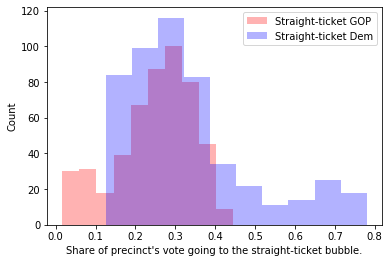

In [6]:
plt.figure()
plt.hist(share_of_ballots_straight_ticket_gop, color='red', label='Straight-ticket GOP', alpha=0.3)
plt.hist(share_of_ballots_straight_ticket_dem, color='blue', label='Straight-ticket Dem', alpha=0.3)
plt.xlabel("Share of precinct's vote going to the straight-ticket bubble.")
plt.ylabel('Count')
plt.legend()
plt.show()

Oakland County is either fairly Democratic-leaning, or its Democrats are more likely to use the straight-ticket option. Turns out it's fairly Democratic leaning, and its Democratic voters don't use straight-ticket uniformly across precincts. Here's a histogram of the presidential vote across precincts. I plotted Trump and Biden separately, though they are fairly symmetric (there were few third-party votes, so a precinct with a high Biden vote share has a correspondingly low Trump vote share).

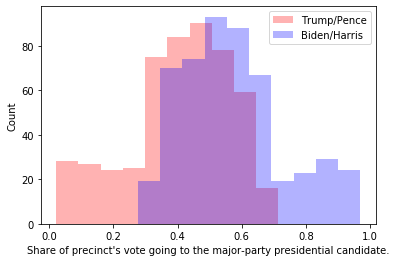

In [7]:
plt.figure()
plt.hist(share_of_ballots_trump, color='red', label='Trump/Pence', alpha=0.3)
plt.hist(share_of_ballots_biden, color='blue', label='Biden/Harris', alpha=0.3)
plt.xlabel("Share of precinct's vote going to the major-party presidential candidate.")
plt.ylabel('Count')
plt.legend()
plt.show()

Already we can see that Oakland County is a fairly Democratic county, which doesn't accord with how it's been portrayed in these articles. In fact, the dominance in Oakland County of Democratic candidates running at the state and national level has now percolated down to the downballot races, where Democrats are dominating pretty much every race but sheriff.

In [8]:
trumpiest_precinct = np.argmax(share_of_ballots_trump)
trumpiest_precinct_val = np.max(share_of_ballots_trump)
print(f"The precinct with the highest share of the vote going to Trump was {precinct_names[trumpiest_precinct][0]}, which went {100*trumpiest_precinct_val:.2f}% for Trump.")

The precinct with the highest share of the vote going to Trump was Fenton, Precinct 2, which went 71.43% for Trump.


Unsurprisingly, tthis is a tiny precinct (15 registered voters, 14 of whom voted in this election, and this vote broke 10 for Trump to 4 for Biden, with no third party, blank, or write-in ballots.

In [9]:
most_straight_ticket_gop = np.argmax(share_of_ballots_straight_ticket_gop)
most_straight_ticket_gop_val = np.max(share_of_ballots_straight_ticket_gop)
print(f"The precinct with the highest share of the votes cast being straight-ticket GOP votes was {precinct_names[most_straight_ticket_gop][0]}, with {100*most_straight_ticket_gop_val:.2f}% of ballots being straight-ticket GOP.")

The precinct with the highest share of the votes cast being straight-ticket GOP votes was Addison Township, Precinct 2, with 44.39% of ballots being straight-ticket GOP.


## Reproducing Dr. Shiva's chart

Already we see an issue with Dr. Shiva's analysis. His chart purports to show the share of precincts with straight-ticket GOP votes on the $x$-axis. In fact, the share of the precincts with Trump votes is on the $x$-axis.

![Shiva's analysis](screenshot1.png)
![Shiva's analysis](screenshot2.png)

We see Fenton, Precinct 2 is the right-most point (on the bottom right), with 71.43% of the vote going to Trump. It's plotted at roughly (71%, -23%) which would indicate that 71% of the ballots were marked straight ticket GOP but that Trump got only $71-23=48\%$ of the vote.

In [10]:
print(f"In fact, it received {biden_harris_total_by_precinct[trumpiest_precinct][0]} Biden votes, of which {dem_straight_ticket_totals[trumpiest_precinct][0]} were straight-ticket Democratic, and {trump_pence_total_by_precinct[trumpiest_precinct][0]} Trump votes, of which {gop_straight_ticket_totals[trumpiest_precinct][0]} were straight-ticket GOP.")

In fact, it received 4 Biden votes, of which 2 were straight-ticket Democratic, and 10 Trump votes, of which 4 were straight-ticket GOP.


There are no missing Trump votes here! This precinct had 6 surplus Trump votes and 2 surplus Biden votes, above its straight-ticket votes for each ticket.

### Let's look more systematically at where votes were coming from: straight-ticket voting (filling in the straight-ticket party bubble), or split-ticket voting (filling in the bubble next to the presidential candidate's name)

Let us define the *surplus vote* of a candidate to be the total number of votes that candidate received, minus the total number of ballots marked as straight-ticket votes for that candidate's party.

Note that you can fill in the straight-ticket GOP bubble but then also vote for Biden/Harris on the presidential line. This will override your straight-ticket vote just for that race. You can, therefore, have a negative surplus, but in fact this is not seen in Oakland County.

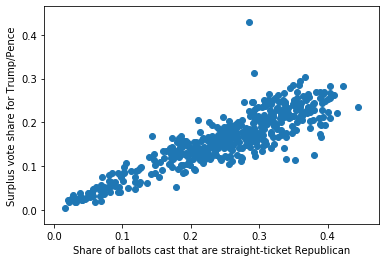

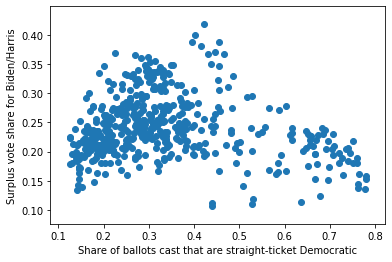

In [11]:

share_of_ballots_hand_marked_for_trump = share_of_ballots_trump - share_of_ballots_straight_ticket_gop # surplus vote share

plt.figure()
x = share_of_ballots_straight_ticket_gop
y = share_of_ballots_hand_marked_for_trump
plt.scatter(x,y)
plt.xlabel("Share of ballots cast that are straight-ticket Republican")
plt.ylabel("Surplus vote share for Trump/Pence")
plt.show()


share_of_ballots_hand_marked_for_biden = share_of_ballots_biden - share_of_ballots_straight_ticket_dem # surplus vote share

plt.figure()
x = share_of_ballots_straight_ticket_dem
y = share_of_ballots_hand_marked_for_biden
plt.scatter(x,y)
plt.xlabel("Share of ballots cast that are straight-ticket Democratic")
plt.ylabel("Surplus vote share for Biden/Harris")
plt.show()


We do see an interesting pattern here. As the share of straight-ticket votes for the GOP increases, so too does the share of ballots that have surplus votes for Trump. What we see is the *opposite* of what Dr. Shiva claims. It's as if Republican voters flip a coin when deciding whether to vote straight-ticket or to fill in full ballot. The share of surplus Democratic votes doesn't fit this neat pattern by precinct. There are many explanations for this. Perhaps more heavily Democratic precincts have more lines, and so a higher share of the electorate opts for straight-party voting.

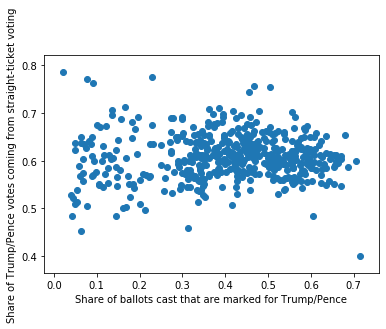

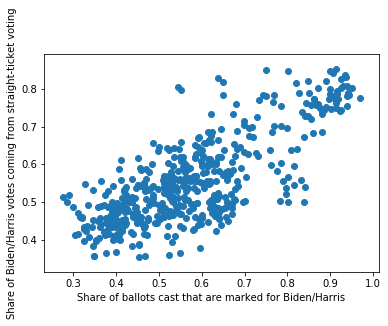

In [12]:
plt.figure()
x = share_of_ballots_trump
y = np.divide(share_of_ballots_straight_ticket_gop, share_of_ballots_trump)
plt.scatter(x,y)
plt.xlabel("Share of ballots cast that are marked for Trump/Pence")
plt.ylabel("Share of Trump/Pence votes coming from straight-ticket voting")
plt.show()


plt.figure()
x = share_of_ballots_biden
y = np.divide(share_of_ballots_straight_ticket_dem, share_of_ballots_biden)
plt.scatter(x,y)
plt.xlabel("Share of ballots cast that are marked for Biden/Harris")
plt.ylabel("Share of Biden/Harris votes coming from straight-ticket voting")
plt.show()



When we plot it this way we see clearly that Biden voters are more likely to opt for straight-ticket voting in more heavily Democratic precincts. We do know the Michigan Democratic Party has been promoting this option since the Promote the Vote initiative passed, and perhaps this message was especially likely to be promoted in Democratic-leaning neighborhoods.

### Feel free to use this as a template for other investigations. (No need to cite this notebook, I didn't really do anything.)

For instance, third-party voting was especially high in 2016. In the counties I looked at, it was the swingier precincts themselves that had the highest share of wasted votes. I found that interesting because I would have assumed that people in heavily Democratic or Republican areas would feel like the election wasn't close and would feel more comfortable throwing away their vote in a giant wanking gesture.

But the core wank voter seemed (in my extremely limited investigation) to be in the sort of precinct that was in transition from a Republican precinct to a Democratic precinct. People perhaps felt like the election would be close -- their neighbors might have had competing lawn signs -- but there were more people with split identities. The sort of "Trump is gross but I want my Republican neighbor in Lansing fighting this crazy idea that poor kids should also have high-quality public schools" you find a lot of when canvassing. Sometimes they're 1s or 2s for us on the presidential level but the coordinated campaign quickly takes them off their target list because boy are they voting for some bad people downballot. In Massachusetts, Charlie Baker is a magnet for these idiotic voters, and Charlie Baker himself is a presidential wank voter.

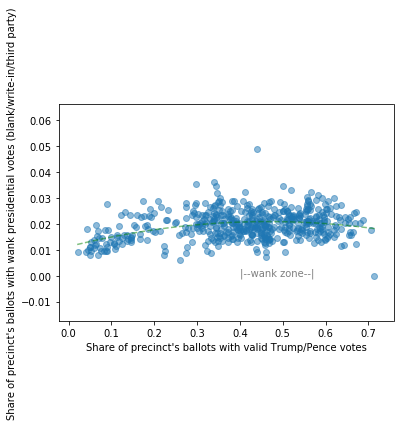

In [13]:
neither_party_share = 1-(share_of_ballots_biden+share_of_ballots_trump)
plt.figure()
x = share_of_ballots_trump[:,0].astype(float)
y = neither_party_share[:,0].astype(float)
plt.scatter(x,y, alpha=0.5)
coeffs=np.polyfit(x,y,deg=2)
p = np.poly1d(coeffs)
xp = np.linspace(0.02,0.72,500)
plt.plot(xp, p(xp),'g--', alpha=0.5)
plt.text(0.4,0,'|--wank zone--|', alpha=0.5)
plt.ylabel("Share of precinct's ballots with wank presidential votes (blank/write-in/third party)")
plt.xlabel("Share of precinct's ballots with valid Trump/Pence votes")
plt.show()



We see a slightly $\cap$-shaped curve in the least-squares fit, but there weren't many wank voters and it's not even worth bothering doing a statistical test to isolate the wank zone as it's not really pronounced.

In [14]:
print(f"Who are the biggest wanks of all? {precinct_names[np.argmax(neither_party_share)][0]}. Biden share: {share_of_ballots_biden[np.argmax(neither_party_share)][0]*100:.2f}%. Trump share: {share_of_ballots_trump[np.argmax(neither_party_share)][0]*100:.2f}%. Wank share: {np.max(neither_party_share)*100:.2f}%. Yup, classic wankers.")

Who are the biggest wanks of all? Novi Township, Precinct 1. Biden share: 51.22%. Trump share: 43.90%. Wank share: 4.88%. Yup, classic wankers.
